In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib as plt

In [4]:
table = pd.read_csv("2017_jun_final.csv")

In [5]:
table.head()

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


In [6]:
table.shape

(8704, 25)

In [7]:
table.dtypes ## types of the columns

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [8]:
missing_data = table.isnull().sum() ## null in the column

In [9]:
data_to_delete = missing_data[missing_data > 0]

In [10]:
data_to_delete

Язык.программирования    3850
Специализация            7219
Университет               358
Предметная.область        223
Валюта                   8694
cls                      1574
dtype: int64

In [11]:
data_to_delete_languages_removed = data_to_delete.drop(labels = ["Язык.программирования"])

In [12]:
data_to_delete_languages_removed

Специализация         7219
Университет            358
Предметная.область     223
Валюта                8694
cls                   1574
dtype: int64

In [13]:
list_columns_to_delete = data_to_delete_languages_removed.index.tolist()

In [14]:
table = table.drop(labels=list_columns_to_delete,axis=1) ## remove empty columns

In [15]:
table.isnull().sum()

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64

In [16]:
table = table.dropna() #### remove rows with missing data

In [17]:
table.shape

(4854, 20)

In [18]:
python_data = table[table["Язык.программирования"]=="Python"] ## select developers on Python

In [19]:
python_data

,N,Должность,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
12,13,Software Engineer,Python,1,меньше 3 месяцев,800,200,Киев,до 50 человек,Аутсорсинговая,мужской,26,Высшее,False,ниже среднего,12/06/2017 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800
68,69,Software Engineer,Python,1.5,0.5,900,900,Киев,до 10 человек,Стартап,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900
87,88,Junior Software Engineer,Python,0.5,0.5,600,0,Киев,до 10 человек,Аутсорсинговая,мужской,19,Незаконченное высшее,True,выше среднего,12/06/2017 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600
114,115,Junior Software Engineer,Python,1.5,0.5,685,250,Киев,до 1000 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,False,средний,12/06/2017 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685
143,144,Junior Software Engineer,Python,1,1,750,250,Киев,до 10 человек,Аутсорсинговая,мужской,21,Незаконченное высшее,True,выше среднего,12/06/2017 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8546,8547,Software Engineer,Python,5,1,2000,800,Запорожье,до 50 человек,Аутсорсинговая,мужской,22,Незаконченное высшее,False,средний,10/07/2017 14:11:26,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,5.0,1.0,2000
8625,8626,Software Engineer,Python,4,1,1750,0,Киев,свыше 1000 человек,Аутсорсинговая,мужской,28,Среднее,False,средний,11/07/2017 16:15:40,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,4.0,1.0,1750
8635,8636,Senior Software Engineer,Python,10 и более лет,меньше 3 месяцев,4000,1300,Удаленно,до 10 человек,Стартап,мужской,33,Высшее,False,выше среднего,11/07/2017 17:51:36,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,10.0,0.0,4000
8673,8674,Junior Software Engineer,Python,0.5,0.5,350,50,Киев,до 50 человек,Аутсорсинговая,мужской,22,Высшее,False,средний,12/07/2017 09:37:16,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,0.5,0.5,350


In [20]:
python_data.shape

(207, 20)

In [21]:
python_data.groupby(by="Должность").sum()

,N,Язык.программирования,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
Должность,,,,,,,,,,,,,,,,,,,
Junior Software Engineer,224221,PythonPythonPythonPythonPythonPythonPythonPyth...,0.51.510.50.2511меньше 3 месяцев0.51.51.51.511...,0.50.510.50.25меньше 3 месяцев1меньше 3 месяце...,35333,11405,КиевКиевКиевВинницаКиевХарьковЛьвовКиевЛьвовУд...,до 10 человекдо 1000 человекдо 10 человекдо 20...,АутсорсинговаяАутсорсинговаяАутсорсинговаяАутс...,мужскоймужскоймужскоймужскоймужскоймужскоймужс...,1523,Незаконченное высшееНезаконченное высшееНезако...,24,выше среднегосреднийвыше среднегониже среднего...,12/06/2017 13:12:2512/06/2017 13:14:5212/06/20...,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,55.25,33.00,35333
Senior Software Engineer,148238,PythonPythonPythonPythonPythonPythonPythonPyth...,10 и более лет7210 и более лет454710 и более л...,0.50.5221меньше 3 месяцев1.54321.50.253меньше ...,105000,13380,КиевДнепрЛьвовУдаленноЛьвовХарьковУдаленноХарь...,до 200 человекдо 200 человекдо 50 человекдо 10...,ПродуктоваяАутсорсинговаяДругаяСтартапАутсорси...,мужскоймужскоймужскоймужскоймужскоймужскоймужс...,901,ВысшееВысшееНезаконченное высшееВысшееВысшееВы...,1,выше среднеговыше среднегосреднийэлементарныйв...,12/06/2017 13:46:2412/06/2017 13:58:1612/06/20...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,207.00,48.25,105000
Software Engineer,366884,PythonPythonPythonPythonPythonPythonPythonPyth...,11.52845257333221.50.52541.5111.5142426345210 ...,меньше 3 месяцев0.5121.53210.2531110.5меньше 3...,179907,47983,КиевКиевДнепрЛьвовДругойКиевХмельницкийУдаленн...,до 50 человекдо 10 человекдо 50 человекдо 1000...,АутсорсинговаяСтартапАутстаффинговаяАутсорсинг...,мужскоймужскоймужскоймужскоймужскоймужскоймужс...,2663,ВысшееНезаконченное высшееКандидатВысшееВысшее...,13,ниже среднеговыше среднегопродвинутыйвыше сред...,12/06/2017 13:05:5412/06/2017 13:11:1712/06/20...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,318.00,112.75,179907
System Architect,13978,PythonPython,10 и более лет10 и более лет,0.252,8000,0,КиевКиев,до 50 человекдо 10 человек,ПродуктоваяПродуктовая,мужскоймужской,71,ВысшееВысшее,0,выше среднегосредний,20/06/2017 18:40:4006/07/2017 19:15:05,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:53....,20.00,2.25,8000
Technical Lead,59072,PythonPythonPythonPythonPythonPythonPythonPyth...,410 и более лет10 и более лет2510 и более лет1...,1.520.25230.57310 и более лет17,34825,5005,КиевКиевКиевХарьковДнепрЛьвовХарьковОдессаХерс...,до 50 человекдо 50 человексвыше 1000 человекдо...,ПродуктоваяАутсорсинговаяАутсорсинговаяАутсорс...,мужскоймужскоймужскоймужскоймужскоймужскоймужс...,331,Незаконченное высшееВысшееВысшееВысшееВысшееВы...,0,выше среднеговыше среднеговыше среднегосредний...,13/06/2017 12:37:0213/06/2017 14:51:1914/06/20...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_5...,78.00,37.25,34825


In [22]:
job_position_python_data = python_data.groupby(by="Должность")

In [23]:
job_position_python_data["Зарплата.в.месяц"].agg(["min","max"])

,min,max
Должность,,
Junior Software Engineer,100,1250
Senior Software Engineer,1300,9200
Software Engineer,500,5400
System Architect,3000,5000
Technical Lead,1425,6200


In [24]:
job_position_salary = python_data[["Должность","Зарплата.в.месяц"]]

In [25]:
job_position_salary[job_position_salary["Должность"]=="Junior Software Engineer"].iloc[:,1].mean()

560.8412698412699

In [26]:
def fill_avg_salary_apply_to_table(table_with_jobs_salary):
    positions = ["Junior Software Engineer","Senior Software Engineer","Software Engineer","System Architect","Technical Lead"]
    means = []
    for position in positions:
        mean = table_with_jobs_salary[table_with_jobs_salary["Должность"]==position].iloc[:,1].mean()
        means.append(mean)
    return pd.DataFrame(data = {"position":positions,"avg":means})

In [27]:
fill_avg_salary_apply_to_table(job_position_salary)

,position,avg
0,Junior Software Engineer,560.841270
1,Senior Software Engineer,3387.096774
2,Software Engineer,1799.070000
3,System Architect,4000.000000
4,Technical Lead,3165.909091


In [28]:
average = fill_avg_salary_apply_to_table(job_position_salary)["avg"]

In [29]:
average.tolist()

[560.8412698412699, 3387.0967741935483, 1799.07, 4000.0, 3165.909090909091]

In [30]:
position_min_max = job_position_python_data["Зарплата.в.месяц"].agg(["min","max"])

In [31]:
position_min_max["avg"]=average.tolist()

In [32]:
position_min_max

,min,max,avg
Должность,,,
Junior Software Engineer,100,1250,560.841270
Senior Software Engineer,1300,9200,3387.096774
Software Engineer,500,5400,1799.070000
System Architect,3000,5000,4000.000000
Technical Lead,1425,6200,3165.909091


In [33]:
position_min_max.describe

<bound method NDFrame.describe of                            min   max          avg
Должность                                        
Junior Software Engineer   100  1250   560.841270
Senior Software Engineer  1300  9200  3387.096774
Software Engineer          500  5400  1799.070000
System Architect          3000  5000  4000.000000
Technical Lead            1425  6200  3165.909091>

In [34]:
position_min_max.to_csv("CSV.csv")

In [41]:
position_min_max.index

Index(['Junior Software Engineer', 'Senior Software Engineer',
       'Software Engineer', 'System Architect', 'Technical Lead'],
      dtype='object', name='Должность')

<Axes: title={'center': 'Developer Salaries'}, xlabel='Должность', ylabel='Salary, $'>

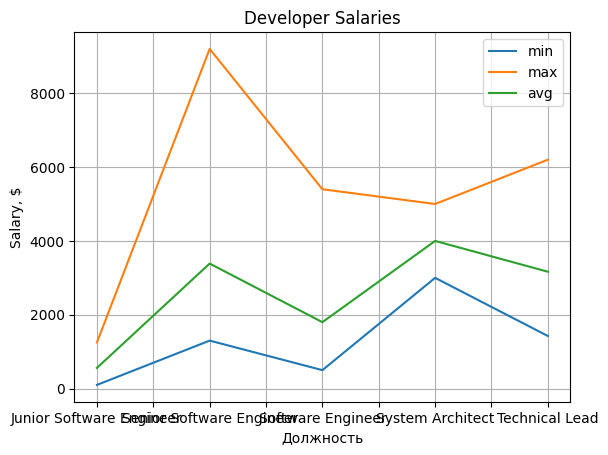

In [44]:
position_min_max.plot(title = "Developer Salaries",grid=True,ylabel="Salary, $")

<Axes: title={'center': 'Developer Salaries'}, xlabel='Должность', ylabel='Salary, $'>

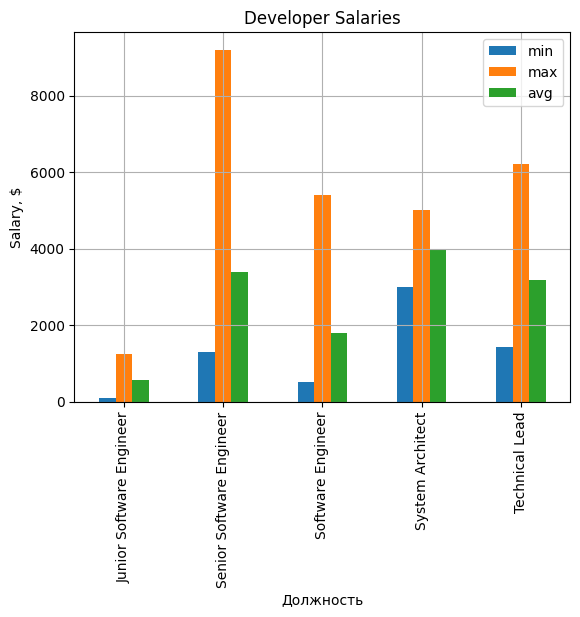

In [47]:
position_min_max.plot(kind="bar",title = "Developer Salaries",grid=True,ylabel="Salary, $")

<Axes: title={'center': 'Programming language of Junior Developers'}, xlabel='Язык.программирования', ylabel='Number of developers'>

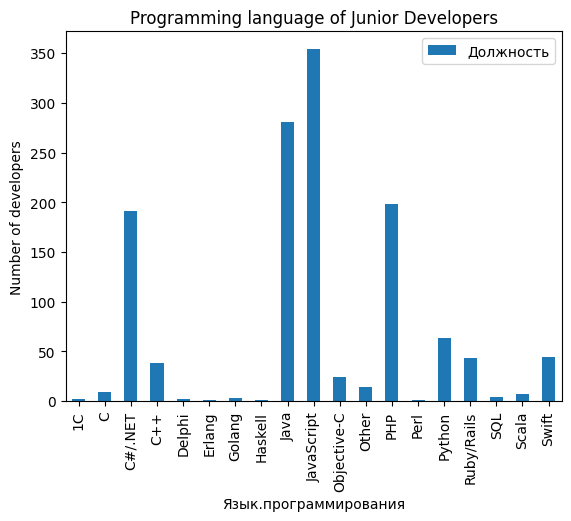

In [85]:
table[table["Должность"]=="Junior Software Engineer"].iloc[:,1:3].groupby(by="Язык.программирования").count().plot(kind="bar",title = "Programming language of Junior Developers",ylabel="Number of developers")

In [59]:
junior_developer = pd.DataFrame(data=table[table["Должность"]=="Junior Software Engineer"]["Язык.программирования"].values.tolist())

In [62]:
junior_developer.columns